# trainTWO model8_FORSYTHIA

WITH SENTENCE : 개나리 노오란 꽃 그늘 아래

forsythiaTWO = {0:'flower', 1:'shadow_', 2:'below'}

- forsythiaTWO.h5(1): 200/200/200 // epoch=50 // acc:98%
- forsythiaTWO.h5(2): 200/400/400 // epoch=50 // acc:100%
- forsythiaTWO.h5(3): 1000/1200/1200 // epoch=30 // acc:99%
- forsythiaTWO.h5(4):       epoch=50
- forsythiaTWO.h5(5):      epoch=50

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from itertools import chain

forsythiaTWO = {0:'flower', 1:'shadow_', 2:'below'}
actions = []

for v in forsythiaTWO.values():
    actions.append(v)
print(actions)

['flower', 'shadow_', 'below']


In [4]:
# cloudTWO
data = np.concatenate([
                       # below : 1200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_below_1635908069.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_below_1635908666.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_below_1636376731.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_below_1636376854.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_below_1636377005.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_below_1636377126.npy'),
                       # flower : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_flower_1635908069.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_flower_1636376731.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_flower_1636376854.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_flower_1636377005.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_flower_1636377126.npy'),
                       # shadow_ : 1200
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_shadow__1635908069.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_shadow__1635908666.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_shadow__1636376731.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_shadow__1636376854.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_shadow__1636377005.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/forsythiaTWO/two_SL_shadow__1636377126.npy')
                       
               
], axis=0)

data.shape

(3230, 10, 144)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(3230, 10, 143)
(3230,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(3230, 3)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2907, 10, 143) (2907, 3)
(323, 10, 143) (323, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                53248     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 55,427
Trainable params: 55,427
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/30
91/91 [==============================] - 3s 15ms/step - loss: 33.5349 - acc: 0.6340 - val_loss: 2.4327 - val_acc: 0.8947

Epoch 00001: val_acc improved from -inf to 0.89474, saving model to models/model.h5
Epoch 2/30
91/91 [==============================] - 1s 11ms/step - loss: 0.8603 - acc: 0.9470 - val_loss: 0.3289 - val_acc: 0.9443

Epoch 00002: val_acc improved from 0.89474 to 0.94427, saving model to models/model.h5
Epoch 3/30
91/91 [==============================] - 1s 11ms/step - loss: 0.2128 - acc: 0.9718 - val_loss: 0.1618 - val_acc: 0.9783

Epoch 00003: val_acc improved from 0.94427 to 0.97833, saving model to models/model.h5
Epoch 4/30
91/91 [==============================] - 1s 11ms/step - loss: 0.1216 - acc: 0.9783 - val_loss: 0.2092 - val_acc: 0.9721

Epoch 00004: val_acc did not improve from 0.97833
Epoch 5/30
91/91 [==============================] - 1s 11ms/step - loss: 0.0935 - acc: 0.9838 - val_loss: 0.1370 - val_acc: 0.9845

Epoch 00005: val_acc improved f

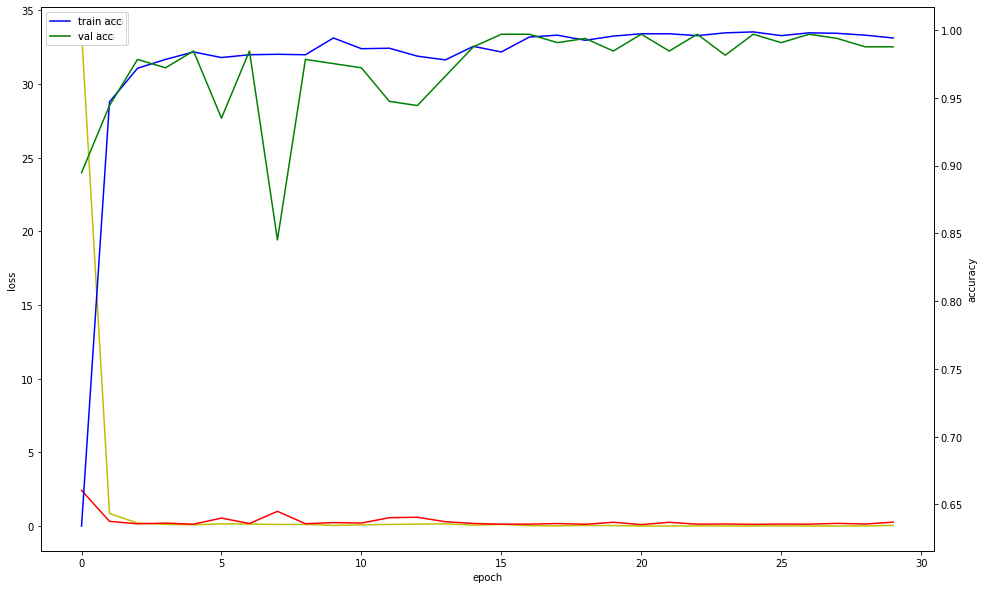

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[223,   1],
        [  0,  99]],

       [[211,   0],
        [  0, 112]],

       [[211,   0],
        [  1, 111]]])

In [12]:
from keras.models import load_model

model.save('forsythiaTWO_3.h5')

from google.colab import files
files.download('forsythiaTWO_3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>